**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

Img out Width:  2812  Height:  3692
Img out Width:  703  Height:  923
HScale:  4
WScale:  4


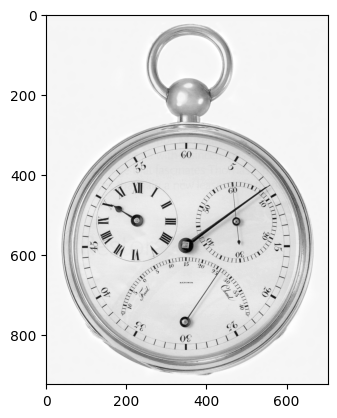

In [2]:
# type your code here
# Python code to read image

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)

# plt.imshow(img, cmap='gray', vmin=0, vmax=255)

currDPI = 1250
newDPI = 300

initialHeight = img.shape[0];
initialWidth = img.shape[1];

imgOutHeight = math.ceil(newDPI * initialHeight / currDPI)
imgOutWidth  = math.ceil(newDPI * initialWidth / currDPI)

hScaleFactor = math.floor(initialHeight/imgOutHeight);
wScaleFactor = math.floor(initialWidth/imgOutWidth);

imgOutHeight = int(initialHeight/hScaleFactor)
imgOutWidth  = int(initialWidth/wScaleFactor)


print("Img out Width: ", initialWidth, " Height: ", initialHeight)
print("Img out Width: ", imgOutWidth, " Height: ", imgOutHeight)

print("HScale: ", hScaleFactor)
print("WScale: ", wScaleFactor)

# convertendo a imagem para 300 dpi

imgOut = np.zeros((imgOutHeight, imgOutWidth))
currentLine = 0
currentColumn = 0

iOut = 0
jOut = 0

for i in range(0, initialHeight, hScaleFactor):
    for j in range(0, initialWidth, wScaleFactor):
       pixelsBlock = img[i:i+hScaleFactor, j:j+wScaleFactor];
       blockAvg = int(np.average(pixelsBlock))
       imgOut[iOut, jOut] = blockAvg
       jOut+=1
    jOut = 0
    iOut+=1

# plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.imshow(imgOut, cmap='gray', vmin=0, vmax=255)


2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

Tamanho da imagem :  (452, 374)
[0, 128]


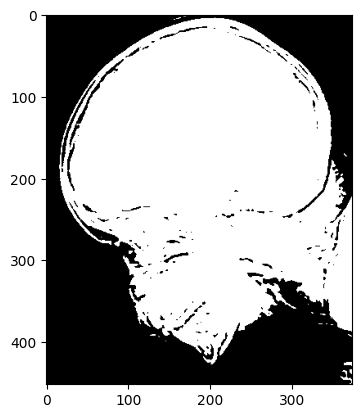

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255);

print('Tamanho da imagem : ',img.shape)
# convertendo para 300dpi

linhas = img.shape[0]
colunas = img.shape[1];

# Com esse parâmetro configura-se o número de bits da imagem
numeroDeBits = 2
distanciaEntreAmostras = 256/numeroDeBits

#Pega a nova paleta de cores
amostra = []
for i in range(0,numeroDeBits):
    amostra.append(int(distanciaEntreAmostras*i))


print(amostra)

for i in range(0, linhas):
    for j in range(0, colunas):
        if(numeroDeBits == 2):
            if(img[i,j] < 128):
                img[i,j] = 0
            else:
                img[i,j] = 255
        else:
            novoValor = 0
            for a in amostra:
                if(a <= img[i,j]):
                    novoValor = a
                else:
                    break
            img[i,j] = novoValor
            

plt.imshow(img, cmap='gray', vmin=0, vmax=255);